In [1]:
# Import necessary libraries
import pandas as pd

# Load the datasets into pandas dataframes
calls_df = pd.read_csv('calls.csv')
customers_df = pd.read_csv('customers.csv')
reason_df = pd.read_csv('reason.csv')
sentiment_df = pd.read_csv('sentiment_statistics.csv')
test_df = pd.read_csv('test.csv')

# Display the first few rows of each dataset to verify loading
print("Calls Dataset:")
print(calls_df.head(), "\n")

print("Customers Dataset:")
print(customers_df.head(), "\n")

print("Reason Dataset:")
print(reason_df.head(), "\n")

print("Sentiment Statistics Dataset:")
print(sentiment_df.head(), "\n")

print("Test Dataset:")
print(test_df.head(), "\n")

Calls Dataset:
      call_id  customer_id  agent_id call_start_datetime  \
0  4667960400   2033123310    963118     7/31/2024 23:56   
1  1122072124   8186702651    519057       8/1/2024 0:03   
2  6834291559   2416856629    158319     7/31/2024 23:59   
3  2266439882   1154544516    488324       8/1/2024 0:05   
4  1211603231   5214456437    721730       8/1/2024 0:04   

  agent_assigned_datetime call_end_datetime  \
0           8/1/2024 0:03     8/1/2024 0:34   
1           8/1/2024 0:06     8/1/2024 0:18   
2           8/1/2024 0:07     8/1/2024 0:26   
3           8/1/2024 0:10     8/1/2024 0:17   
4           8/1/2024 0:14     8/1/2024 0:23   

                                     call_transcript  
0  \n\nAgent: Thank you for calling United Airlin...  
1  \n\nAgent: Thank you for calling United Airlin...  
2  \n\nAgent: Thank you for calling United Airlin...  
3  \n\nAgent: Thank you for calling United Airlin...  
4  \n\nAgent: Thank you for calling United Airlin...   

Customers

In [2]:
# Import necessary libraries
import pandas as pd

# Load the datasets
calls_df = pd.read_csv('calls.csv')
customers_df = pd.read_csv('customers.csv')
reason_df = pd.read_csv('reason.csv')
sentiment_df = pd.read_csv('sentiment_statistics.csv')
test_df = pd.read_csv('test.csv')

# 1. Remove duplicate rows
calls_df.drop_duplicates(inplace=True)
customers_df.drop_duplicates(inplace=True)
reason_df.drop_duplicates(inplace=True)
sentiment_df.drop_duplicates(inplace=True)

# 2. Handle missing values (fill NaN or drop based on importance)
# For demonstration, we'll fill NaNs with a placeholder (could be 0, 'unknown', etc.)
calls_df.fillna({'call_transcript': 'No transcript', 'call_end_datetime': 'N/A'}, inplace=True)
customers_df.fillna({'elite_level_code': 'Unknown'}, inplace=True)
reason_df.fillna('Unknown', inplace=True)
sentiment_df.fillna(0, inplace=True)

# You can also drop rows with a significant amount of missing data if required
# For example:
calls_df.dropna(subset=['call_start_datetime', 'agent_assigned_datetime'], inplace=True)

# 3. Convert date columns to datetime format
calls_df['call_start_datetime'] = pd.to_datetime(calls_df['call_start_datetime'], errors='coerce')
calls_df['agent_assigned_datetime'] = pd.to_datetime(calls_df['agent_assigned_datetime'], errors='coerce')
calls_df['call_end_datetime'] = pd.to_datetime(calls_df['call_end_datetime'], errors='coerce')

# Handle missing or invalid datetime conversion (optional step, you may drop invalid rows)
calls_df.dropna(subset=['call_start_datetime', 'agent_assigned_datetime', 'call_end_datetime'], inplace=True)

# 4. Normalize column names (if necessary)
calls_df.columns = calls_df.columns.str.lower().str.replace(' ', '_')
customers_df.columns = customers_df.columns.str.lower().str.replace(' ', '_')
reason_df.columns = reason_df.columns.str.lower().str.replace(' ', '_')
sentiment_df.columns = sentiment_df.columns.str.lower().str.replace(' ', '_')

# 5. Join datasets if necessary (optional)
# For example, joining calls_df with reason_df based on 'call_id'
calls_with_reasons_df = pd.merge(calls_df, reason_df, on='call_id', how='left')

# Display a sample of the cleaned data
print("Cleaned Calls Data:")
print(calls_df.head(), "\n")

print("Cleaned Customers Data:")
print(customers_df.head(), "\n")

print("Cleaned Reason Data:")
print(reason_df.head(), "\n")

print("Cleaned Sentiment Data:")
print(sentiment_df.head(), "\n")

# Optionally display the merged dataset
print("Calls with Reasons Data:")
print(calls_with_reasons_df.head(), "\n")

Cleaned Calls Data:
      call_id  customer_id  agent_id call_start_datetime  \
0  4667960400   2033123310    963118 2024-07-31 23:56:00   
1  1122072124   8186702651    519057 2024-08-01 00:03:00   
2  6834291559   2416856629    158319 2024-07-31 23:59:00   
3  2266439882   1154544516    488324 2024-08-01 00:05:00   
4  1211603231   5214456437    721730 2024-08-01 00:04:00   

  agent_assigned_datetime   call_end_datetime  \
0     2024-08-01 00:03:00 2024-08-01 00:34:00   
1     2024-08-01 00:06:00 2024-08-01 00:18:00   
2     2024-08-01 00:07:00 2024-08-01 00:26:00   
3     2024-08-01 00:10:00 2024-08-01 00:17:00   
4     2024-08-01 00:14:00 2024-08-01 00:23:00   

                                     call_transcript  
0  \n\nAgent: Thank you for calling United Airlin...  
1  \n\nAgent: Thank you for calling United Airlin...  
2  \n\nAgent: Thank you for calling United Airlin...  
3  \n\nAgent: Thank you for calling United Airlin...  
4  \n\nAgent: Thank you for calling United Airlin

In [3]:
# Import necessary libraries
import pandas as pd

# Load the datasets (assumed to have already been cleaned)
calls_df = pd.read_csv('calls.csv')
customers_df = pd.read_csv('customers.csv')
reason_df = pd.read_csv('reason.csv')
sentiment_df = pd.read_csv('sentiment_statistics.csv')

# 1. Merge `calls_df` with `customers_df` on `customer_id`
calls_customers_df = pd.merge(calls_df, customers_df, on='customer_id', how='left')

# 2. Merge `calls_customers_df` with `reason_df` on `call_id`
calls_customers_reason_df = pd.merge(calls_customers_df, reason_df, on='call_id', how='left')

# 3. Merge `calls_customers_reason_df` with `sentiment_df` on `call_id`
merged_df = pd.merge(calls_customers_reason_df, sentiment_df, on='call_id', how='left')

# Display the final merged DataFrame
print("Final Merged Dataset:")
print(merged_df.head(), "\n")

# Save the merged dataset to a CSV file (optional)
merged_df.to_csv('final_merged_dataset.csv', index=False)

Final Merged Dataset:
      call_id  customer_id  agent_id_x call_start_datetime  \
0  4667960400   2033123310      963118     7/31/2024 23:56   
1  1122072124   8186702651      519057       8/1/2024 0:03   
2  6834291559   2416856629      158319     7/31/2024 23:59   
3  2266439882   1154544516      488324       8/1/2024 0:05   
4  1211603231   5214456437      721730       8/1/2024 0:04   

  agent_assigned_datetime call_end_datetime  \
0           8/1/2024 0:03     8/1/2024 0:34   
1           8/1/2024 0:06     8/1/2024 0:18   
2           8/1/2024 0:07     8/1/2024 0:26   
3           8/1/2024 0:10     8/1/2024 0:17   
4           8/1/2024 0:14     8/1/2024 0:23   

                                     call_transcript      customer_name  \
0  \n\nAgent: Thank you for calling United Airlin...     Matthew Foster   
1  \n\nAgent: Thank you for calling United Airlin...      Tammy Walters   
2  \n\nAgent: Thank you for calling United Airlin...      Jeffery Dixon   
3  \n\nAgent: Thank yo

In [4]:
import pandas as pd

# Convert `call_start_datetime` and `call_end_datetime` to datetime format for proper time calculations
merged_df['call_start_datetime'] = pd.to_datetime(merged_df['call_start_datetime'])
merged_df['call_end_datetime'] = pd.to_datetime(merged_df['call_end_datetime'])

# 1. Compute Call Counts
total_calls = merged_df['call_id'].nunique()
calls_by_agent = merged_df.groupby('agent_id_x')['call_id'].nunique().reset_index(name='call_count')
calls_by_customer = merged_df.groupby('customer_id')['call_id'].nunique().reset_index(name='call_count')
calls_by_reason = merged_df.groupby('primary_call_reason')['call_id'].nunique().reset_index(name='call_count')

print(f"Total number of calls: {total_calls}")
print("\nCall counts by agent:\n", calls_by_agent.head())
print("\nCall counts by customer:\n", calls_by_customer.head())
print("\nCall counts by primary reason:\n", calls_by_reason.head())

# 2. Compute Call Duration (in minutes)
merged_df['call_duration'] = (merged_df['call_end_datetime'] - merged_df['call_start_datetime']).dt.total_seconds() / 60

# Compute average and total call duration
avg_call_duration = merged_df['call_duration'].mean()
total_call_duration = merged_df['call_duration'].sum()

print(f"\nAverage call duration: {avg_call_duration:.2f} minutes")
print(f"Total call duration: {total_call_duration:.2f} minutes")

# 3. Sentiment Distribution
# Overall sentiment distribution
sentiment_distribution = merged_df['average_sentiment'].describe()

# Sentiment grouped by agent
sentiment_by_agent = merged_df.groupby('agent_id_x')['average_sentiment'].mean().reset_index(name='avg_sentiment')

# Sentiment grouped by customer tone
sentiment_by_customer_tone = merged_df.groupby('customer_tone')['average_sentiment'].mean().reset_index(name='avg_sentiment')

print("\nOverall sentiment distribution:\n", sentiment_distribution)
print("\nAverage sentiment by agent:\n", sentiment_by_agent.head())
print("\nAverage sentiment by customer tone:\n", sentiment_by_customer_tone.head())

# 4. Silence Percent Distribution
# Silence grouped by agent
silence_by_agent = merged_df.groupby('agent_id_x')['silence_percent_average'].mean().reset_index(name='avg_silence_percent')

print("\nAverage silence percentage by agent:\n", silence_by_agent.head())

Total number of calls: 71810

Call counts by agent:
    agent_id_x  call_count
0      102574           2
1      103651         298
2      106000         113
3      107876           6
4      112609          11

Call counts by customer:
    customer_id  call_count
0        11978           1
1       443070           1
2       474941           1
3       476994           1
4       752705           1

Call counts by primary reason:
   primary_call_reason  call_count
0             Baggage          86
1             Baggage        2616
2           Baggage           130
3             Booking        2589
4           Booking            48

Average call duration: 18.90 minutes
Total call duration: 1357348.00 minutes

Overall sentiment distribution:
 count    71701.000000
mean        -0.033519
std          0.143715
min         -1.380000
25%         -0.110000
50%         -0.020000
75%          0.050000
max          2.670000
Name: average_sentiment, dtype: float64

Average sentiment by agent:
    agen

In [5]:
# Calculate the Handle Time for each call (in minutes)
merged_df['handle_time'] = (merged_df['call_end_datetime'] - merged_df['call_start_datetime']).dt.total_seconds() / 60

# 1. Calculate Overall AHT
total_handle_time = merged_df['handle_time'].sum()
total_calls = merged_df['call_id'].nunique()
overall_aht = total_handle_time / total_calls

print(f"Overall AHT: {overall_aht:.2f} minutes")

# 2. Analyze AHT variations by Agent
aht_by_agent = merged_df.groupby('agent_id_x')['handle_time'].mean().reset_index(name='average_handle_time')
print("\nAHT by Agent:\n", aht_by_agent.head())

# 3. Analyze AHT variations by Customer
aht_by_customer = merged_df.groupby('customer_id')['handle_time'].mean().reset_index(name='average_handle_time')
print("\nAHT by Customer:\n", aht_by_customer.head())

# 4. Analyze AHT variations by Call Type (Primary Call Reason)
aht_by_reason = merged_df.groupby('primary_call_reason')['handle_time'].mean().reset_index(name='average_handle_time')
print("\nAHT by Primary Call Reason:\n", aht_by_reason.head())

# 6. Additional: Analyze AHT variations by Customer Sentiment
aht_by_customer_tone = merged_df.groupby('customer_tone')['handle_time'].mean().reset_index(name='average_handle_time')
print("\nAHT by Customer Tone:\n", aht_by_customer_tone.head())

# 7. Additional: Analyze AHT variations by Agent Sentiment
aht_by_agent_tone = merged_df.groupby('agent_tone')['handle_time'].mean().reset_index(name='average_handle_time')
print("\nAHT by Agent Tone:\n", aht_by_agent_tone.head())

Overall AHT: 18.90 minutes

AHT by Agent:
    agent_id_x  average_handle_time
0      102574            68.000000
1      103651            19.469799
2      106000            18.787611
3      107876            24.333333
4      112609            22.272727

AHT by Customer:
    customer_id  average_handle_time
0        11978                  5.0
1       443070                 14.0
2       474941                 14.0
3       476994                 14.0
4       752705                 13.0

AHT by Primary Call Reason:
   primary_call_reason  average_handle_time
0             Baggage            14.523256
1             Baggage            14.605505
2           Baggage              14.446154
3             Booking            11.099652
4           Booking              12.916667

AHT by Customer Tone:
   customer_tone  average_handle_time
0         angry            18.866255
1          calm            18.957273
2    frustrated            18.825702
3       neutral            19.089657
4        polite

Call Reason Statistics (by Duration and Frequency):
         primary_call_reason  avg_duration  frequency
20                   IRROPS     19.094432      13057
52         Voluntary Change     19.672918      10291
37                  Seating     17.442391       6223
24             Mileage Plus     22.615819       5487
30              Post-Flight     24.961747       3869
10           Communications     17.779571       3779
33    Products and Services     17.597063       2792
45                  Upgrade     15.525727       2682
1                   Baggage     14.605505       2616
3                   Booking     11.099652       2589
8                  Checkout     28.889674       1840
6                  Check-In     15.508725       1490
50         Voluntary Cancel     21.051380       1304
14          Digital Support     14.746988        996
18                      ETC     24.878495        930
41         Traveler Updates     18.072539        772
35          Schedule Change     11.985856     

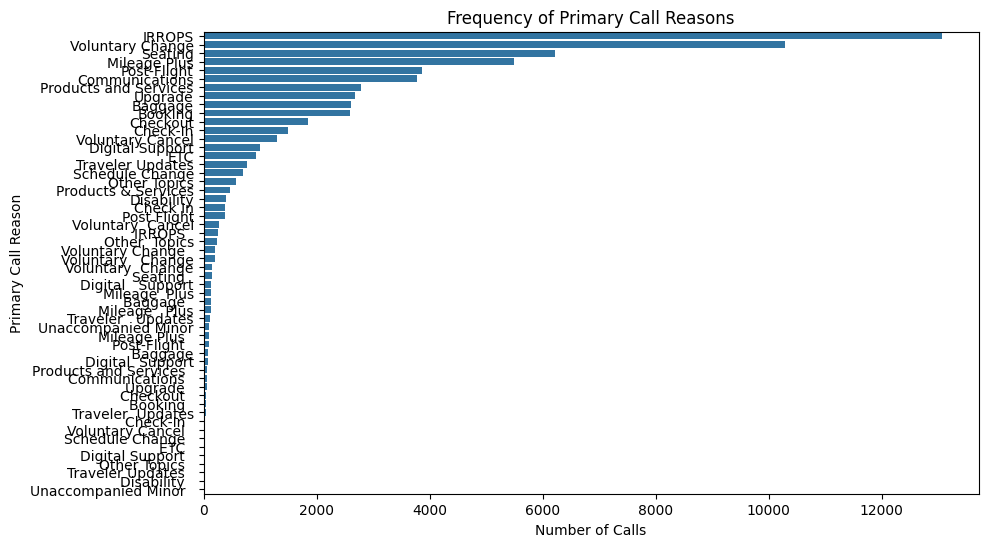

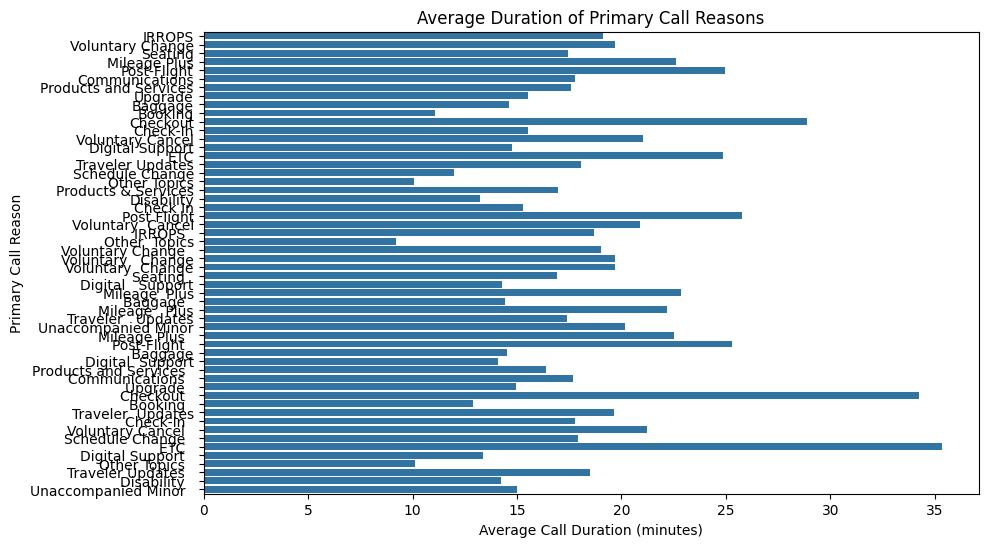

The percentage difference in average duration between the most frequent (IRROPS) and least frequent (Unaccompanied Minor  ) call reasons is 27.30%


In [6]:
# 1. Calculate Call Duration (in minutes)
merged_df['call_duration'] = (merged_df['call_end_datetime'] - merged_df['call_start_datetime']).dt.total_seconds() / 60

# 2. Group by 'primary_call_reason' and calculate average duration and call frequency
call_reason_stats = merged_df.groupby('primary_call_reason').agg(
    avg_duration=('call_duration', 'mean'),
    frequency=('call_id', 'count')
).reset_index()

# Sort by frequency to identify the most common call reasons
call_reason_stats = call_reason_stats.sort_values(by='frequency', ascending=False)

print("Call Reason Statistics (by Duration and Frequency):\n", call_reason_stats)

# 3. Categorize by Duration and Frequency
# Categorize reasons into 'short', 'medium', 'long' based on duration
bins = [0, 5, 10, float('inf')]  # Define bins for short (< 5 min), medium (5-10 min), long (> 10 min)
labels = ['short', 'medium', 'long']
call_reason_stats['duration_category'] = pd.cut(call_reason_stats['avg_duration'], bins=bins, labels=labels)

# 4. Plotting the results (Optional for visual analysis)
import matplotlib.pyplot as plt
import seaborn as sns

# Plot frequency of call reasons
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='primary_call_reason', data=call_reason_stats)
plt.title('Frequency of Primary Call Reasons')
plt.xlabel('Number of Calls')
plt.ylabel('Primary Call Reason')
plt.show()

# Plot average duration of call reasons
plt.figure(figsize=(10, 6))
sns.barplot(x='avg_duration', y='primary_call_reason', data=call_reason_stats)
plt.title('Average Duration of Primary Call Reasons')
plt.xlabel('Average Call Duration (minutes)')
plt.ylabel('Primary Call Reason')
plt.show()

# 5. Further Analysis: Compare most frequent vs least frequent call reasons
most_frequent_reason = call_reason_stats.iloc[0]['primary_call_reason']
least_frequent_reason = call_reason_stats.iloc[-1]['primary_call_reason']

most_frequent_duration = call_reason_stats.iloc[0]['avg_duration']
least_frequent_duration = call_reason_stats.iloc[-1]['avg_duration']

duration_difference = ((most_frequent_duration - least_frequent_duration) / least_frequent_duration) * 100

print(f"The percentage difference in average duration between the most frequent ({most_frequent_reason}) "
      f"and least frequent ({least_frequent_reason}) call reasons is {duration_difference:.2f}%")

In [7]:
# 1. Group by 'primary_call_reason' to calculate average handle time (AHT) and frequency
aht_by_reason = merged_df.groupby('primary_call_reason').agg(
    avg_handle_time=('call_duration', 'mean'),  # AHT calculated using call_duration (already in minutes)
    frequency=('call_id', 'count')              # Frequency of each call reason
).reset_index()

# 2. Sort by frequency to find most frequent and least frequent call reasons
aht_by_reason_sorted = aht_by_reason.sort_values(by='frequency', ascending=False)

# 3. Identify most and least frequent call reasons
most_frequent_reason = aht_by_reason_sorted.iloc[0]['primary_call_reason']
least_frequent_reason = aht_by_reason_sorted.iloc[-1]['primary_call_reason']

most_frequent_aht = aht_by_reason_sorted.iloc[0]['avg_handle_time']
least_frequent_aht = aht_by_reason_sorted.iloc[-1]['avg_handle_time']

# 4. Calculate percentage difference in AHT between most and least frequent reasons
percentage_difference = ((most_frequent_aht - least_frequent_aht) / least_frequent_aht) * 100

# Print results
print(f"Most Frequent Call Reason: {most_frequent_reason} - Avg AHT: {most_frequent_aht:.2f} minutes")
print(f"Least Frequent Call Reason: {least_frequent_reason} - Avg AHT: {least_frequent_aht:.2f} minutes")
print(f"Percentage Difference in AHT: {percentage_difference:.2f}%")

# 5. (Optional) Identify high AHT call reasons: Define a threshold for what is considered "high"
high_aht_threshold = 10  # Example: consider any call reason with avg AHT > 10 minutes as high

high_aht_reasons = aht_by_reason[aht_by_reason['avg_handle_time'] > high_aht_threshold]

print("\nHigh AHT Call Reasons (AHT > 10 minutes):\n", high_aht_reasons)

Most Frequent Call Reason: IRROPS - Avg AHT: 19.09 minutes
Least Frequent Call Reason: Unaccompanied Minor   - Avg AHT: 15.00 minutes
Percentage Difference in AHT: 27.30%

High AHT Call Reasons (AHT > 10 minutes):
         primary_call_reason  avg_handle_time  frequency
0                   Baggage        14.523256         86
1                   Baggage        14.605505       2616
2                 Baggage          14.446154        130
3                   Booking        11.099652       2589
4                 Booking          12.916667         48
5                  Check In        15.290909        385
6                  Check-In        15.508725       1490
7                Check-In          17.793103         29
8                  Checkout        28.889674       1840
9                Checkout          34.250000         48
10           Communications        17.779571       3779
11         Communications          17.688525         61
12        Digital   Support        14.272059        136
1

    agent_tone customer_tone  avg_handle_time  avg_sentiment  call_count
0        angry         angry        15.688312      -0.594675          77
1        angry          calm        13.073529      -0.642500          68
2        angry    frustrated        13.744186      -0.620465          86
3        angry       neutral        12.612500      -0.588375          80
4        angry        polite        13.141026      -0.639744          78
5         calm         angry        17.668224       0.103685        4922
6         calm          calm        17.941971       0.100173        4963
7         calm    frustrated        17.871779       0.101585        4890
8         calm       neutral        17.890026       0.099653        4983
9         calm        polite        17.795607       0.101379        4917
10  frustrated         angry        17.573770      -0.327773         732
11  frustrated          calm        17.171263      -0.327417         689
12  frustrated    frustrated        16.735526      

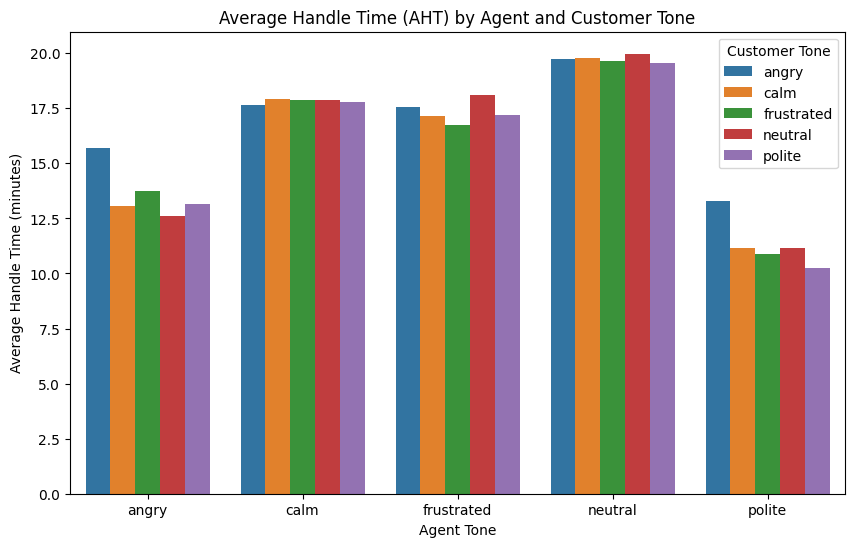

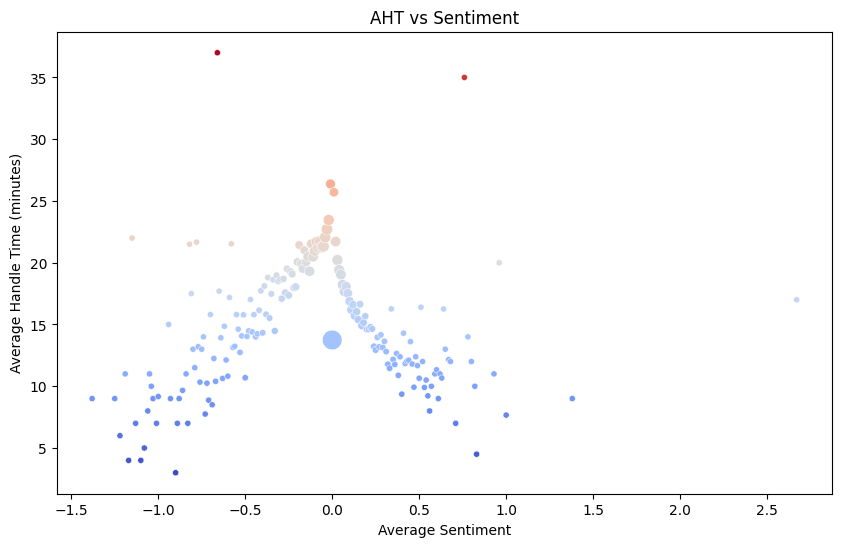

Correlation between Sentiment and AHT: -0.07


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Investigate the relationship between agent_tone, customer_tone, and AHT
tone_aht = merged_df.groupby(['agent_tone', 'customer_tone']).agg(
    avg_handle_time=('call_duration', 'mean'),       # AHT (Average Handle Time)
    avg_sentiment=('average_sentiment', 'mean'),     # Average sentiment score
    call_count=('call_id', 'count')                  # Count of calls for each tone combination
).reset_index()

# Display results
print(tone_aht)

# 2. Investigate how average_sentiment correlates with AHT
sentiment_aht = merged_df.groupby('average_sentiment').agg(
    avg_handle_time=('call_duration', 'mean'),       # AHT
    call_count=('call_id', 'count')                  # Call count for each sentiment level
).reset_index()

# Display results
print(sentiment_aht)

# 3. Visualize the relationship between Agent Tone, Customer Tone, and AHT
plt.figure(figsize=(10, 6))
sns.barplot(data=tone_aht, x='agent_tone', y='avg_handle_time', hue='customer_tone')
plt.title('Average Handle Time (AHT) by Agent and Customer Tone')
plt.xlabel('Agent Tone')
plt.ylabel('Average Handle Time (minutes)')
plt.legend(title='Customer Tone')
plt.show()

# 4. Visualize the relationship between Sentiment and AHT
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sentiment_aht, x='average_sentiment', y='avg_handle_time', size='call_count', sizes=(20, 200), hue='avg_handle_time', palette='coolwarm', legend=False)
plt.title('AHT vs Sentiment')
plt.xlabel('Average Sentiment')
plt.ylabel('Average Handle Time (minutes)')
plt.show()

# 5. Additional Insights: Correlation between Sentiment and AHT
correlation = merged_df[['average_sentiment', 'call_duration']].corr().iloc[0, 1]
print(f"Correlation between Sentiment and AHT: {correlation:.2f}")

Call Types with the Highest AHT:
   primary_call_reason  avg_handle_time  call_count
19               ETC          35.318182          22
9           Checkout          34.250000          48
8             Checkout        28.889674        1840
29         Post Flight        25.782842         373
31       Post-Flight          25.272727          88
30         Post-Flight        24.961747        3869
18                 ETC        24.878495         930
23       Mileage  Plus        22.851852         135
24        Mileage Plus        22.615819        5487
25      Mileage Plus          22.490000         100
Most Common Words in Call Transcripts:
        word  frequency
5     flight     631962
0      agent     555458
3   customer     549932
8        let     310728
2     change     248693
6       help     201067
9       like     194177
13     thank     184727
17    united     173306
1    calling     159962
11      okay     156940
16    typing     155719
7       just     135322
18      work     134

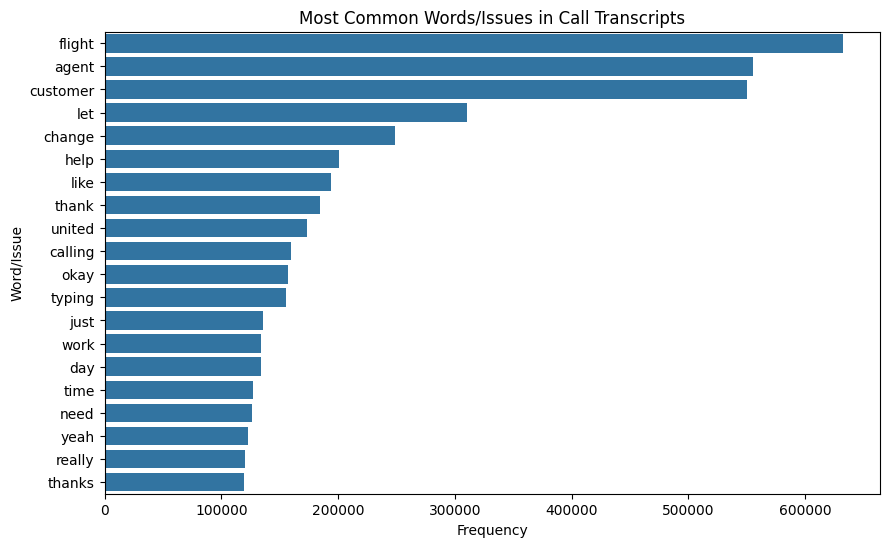

Recurring Issues and Tasks in High AHT Call Types:
- Call Reason: ETC  
  Potential Automation Candidates: []
- Call Reason: Checkout  
  Potential Automation Candidates: []
- Call Reason: Checkout
  Potential Automation Candidates: []
- Call Reason: Post Flight
  Potential Automation Candidates: ['flight']
- Call Reason: Post-Flight  
  Potential Automation Candidates: ['flight']
- Call Reason: Post-Flight
  Potential Automation Candidates: ['flight']
- Call Reason: ETC
  Potential Automation Candidates: []
- Call Reason: Mileage  Plus
  Potential Automation Candidates: []
- Call Reason: Mileage Plus
  Potential Automation Candidates: []
- Call Reason: Mileage Plus  
  Potential Automation Candidates: []


In [9]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate Average AHT by primary_call_reason
call_reason_aht = merged_df.groupby('primary_call_reason').agg(
    avg_handle_time=('call_duration', 'mean'),     # Average Handle Time (AHT)
    call_count=('call_id', 'count')                # Number of Calls
).reset_index()

# Sort by AHT to find the call types with the highest AHT
call_reason_aht = call_reason_aht.sort_values(by='avg_handle_time', ascending=False)

# Display the results
print("Call Types with the Highest AHT:")
print(call_reason_aht.head(10))  # Top 10 call reasons with the highest AHT

# 2. Use NLP to analyze call_transcript and identify recurring tasks or issues
# Using CountVectorizer to identify common words/phrases in call transcripts
vectorizer = CountVectorizer(stop_words='english', max_features=20)  # Top 20 common words
call_transcript_matrix = vectorizer.fit_transform(merged_df['call_transcript'].fillna(''))

# Get the common words
common_words = vectorizer.get_feature_names_out()

# Sum the occurrences of each word
word_frequencies = call_transcript_matrix.sum(axis=0).A1

# Create a DataFrame for word frequencies
word_freq_df = pd.DataFrame({
    'word': common_words,
    'frequency': word_frequencies
}).sort_values(by='frequency', ascending=False)

# Display the most common words/issues from the call transcripts
print("Most Common Words in Call Transcripts:")
print(word_freq_df)

# 3. Visualize the most common issues in call_transcripts
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='word', data=word_freq_df)
plt.title('Most Common Words/Issues in Call Transcripts')
plt.xlabel('Frequency')
plt.ylabel('Word/Issue')
plt.show()

# 4. Combine insights: Assess if these recurring tasks can be automated
# Check if the most time-consuming tasks (from top AHT reasons) align with common words/issues in transcripts
high_aht_call_reasons = call_reason_aht['primary_call_reason'].head(10).tolist()
common_issues_in_transcripts = word_freq_df['word'].tolist()

# Compare the high AHT reasons and common issues
print("Recurring Issues and Tasks in High AHT Call Types:")
for reason in high_aht_call_reasons:
    print(f"- Call Reason: {reason}")
    # Check if related words from transcripts appear in the common issues list
    related_issues = [word for word in common_issues_in_transcripts if word in reason.lower()]
    print(f"  Potential Automation Candidates: {related_issues}")

Correlation between AHT and Silence Percentage: 0.3991
P-value: 0.0000


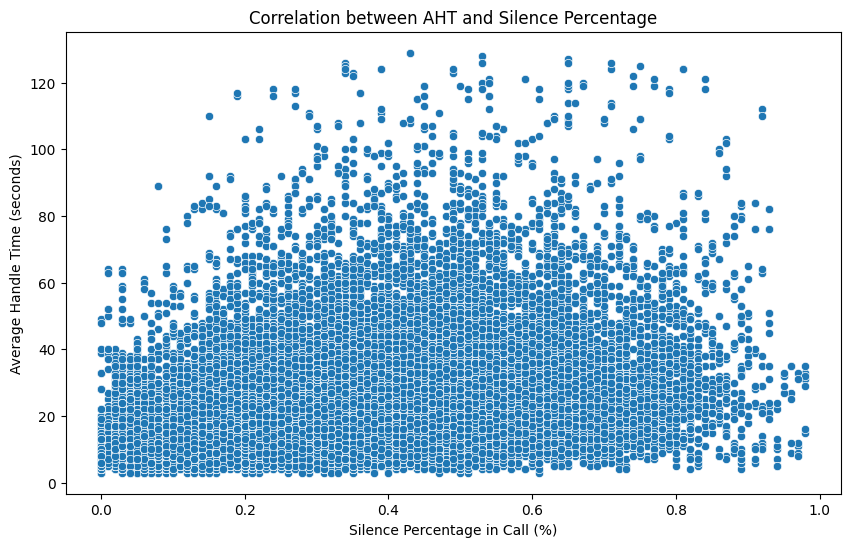

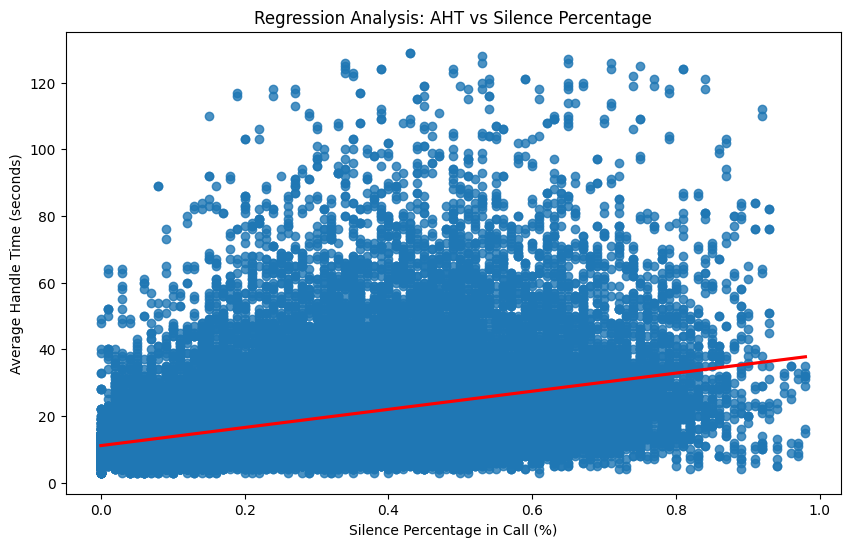

There is a positive correlation of 0.40 between AHT and silence percentage, indicating that calls with more silence tend to have longer handle times.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 1. Filter out any rows with missing values in relevant columns
aht_silence_df = merged_df[['call_duration', 'silence_percent_average']].dropna()

# 2. Compute correlation between AHT and silence percentage
corr_value, p_value = pearsonr(aht_silence_df['call_duration'], aht_silence_df['silence_percent_average'])

print(f"Correlation between AHT and Silence Percentage: {corr_value:.4f}")
print(f"P-value: {p_value:.4f}")

# 3. Visualize the relationship between AHT and silence percentage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='silence_percent_average', y='call_duration', data=aht_silence_df)
plt.title('Correlation between AHT and Silence Percentage')
plt.xlabel('Silence Percentage in Call (%)')
plt.ylabel('Average Handle Time (seconds)')
plt.show()

# 4. Create a regression plot to further analyze the relationship
plt.figure(figsize=(10, 6))
sns.regplot(x='silence_percent_average', y='call_duration', data=aht_silence_df, line_kws={"color": "red"})
plt.title('Regression Analysis: AHT vs Silence Percentage')
plt.xlabel('Silence Percentage in Call (%)')
plt.ylabel('Average Handle Time (seconds)')
plt.show()

# 5. Summary of findings
if corr_value > 0:
    print(f"There is a positive correlation of {corr_value:.2f} between AHT and silence percentage, indicating that calls with more silence tend to have longer handle times.")
else:
    print(f"There is a negative or weak correlation of {corr_value:.2f} between AHT and silence percentage, suggesting that silence may not significantly impact AHT.")

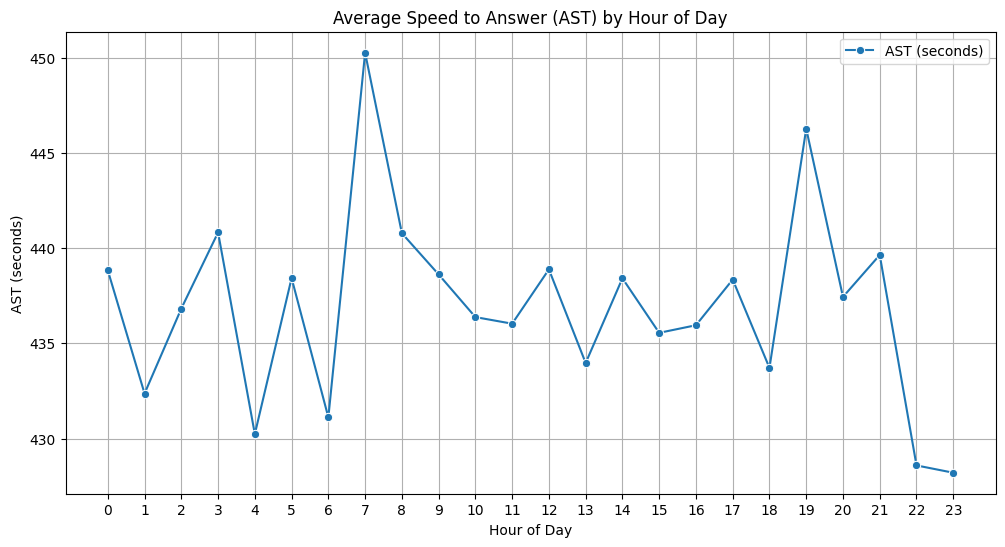

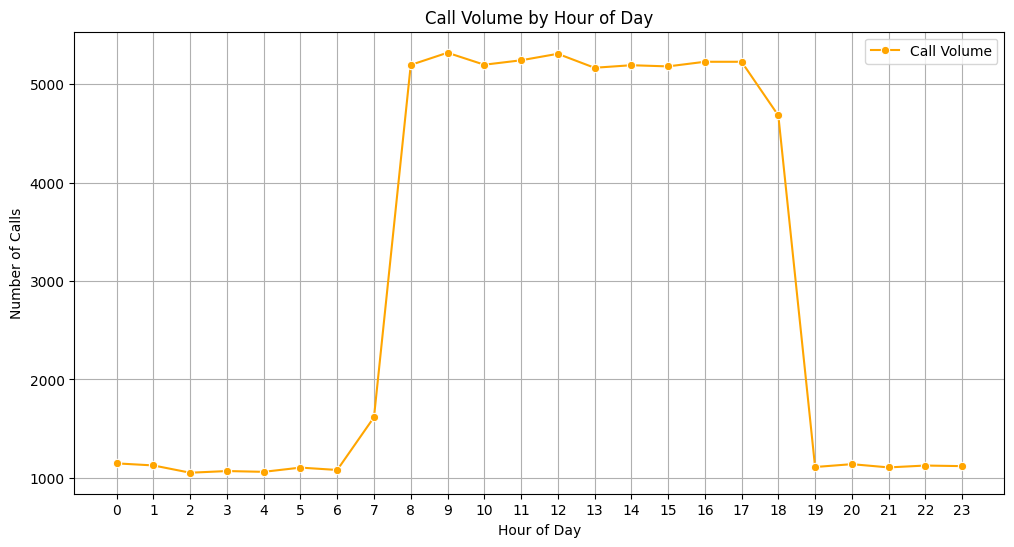

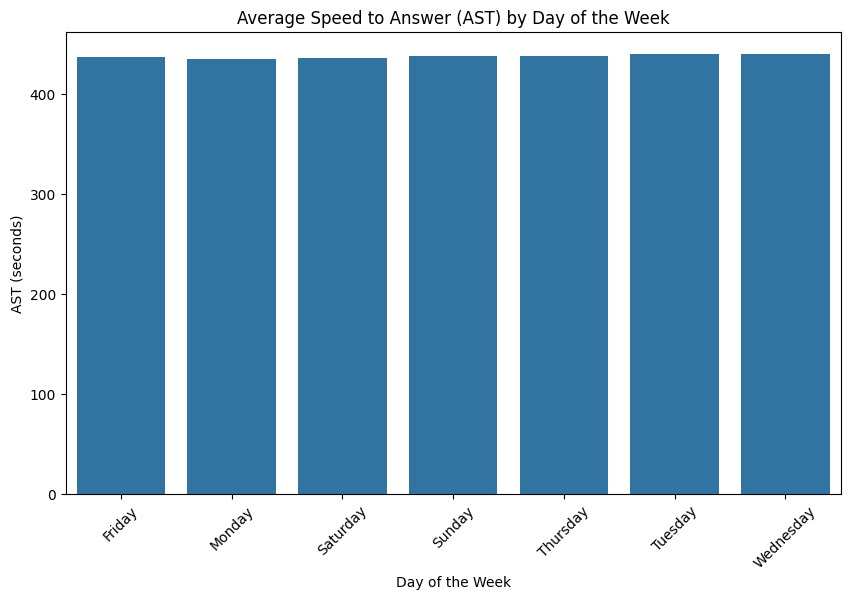

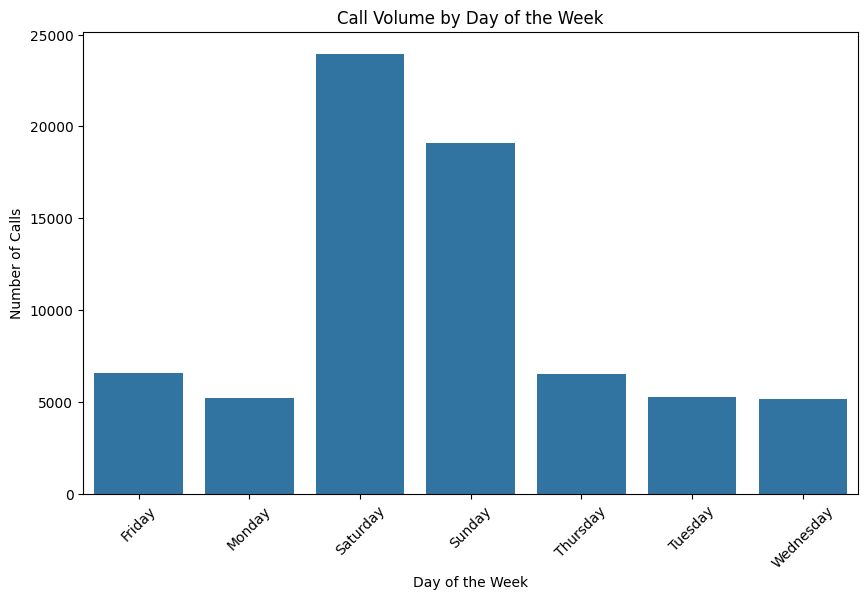

Correlation between AST and call volume by hour: 0.0499
The correlation between call volume and AST is weak, suggesting that other factors (like staffing shortages) may be contributing to higher AST.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'merged_df' is the merged DataFrame containing relevant data

# 1. Convert datetime columns to datetime type if not already done
merged_df['call_start_datetime'] = pd.to_datetime(merged_df['call_start_datetime'])
merged_df['agent_assigned_datetime'] = pd.to_datetime(merged_df['agent_assigned_datetime'])

# 2. Calculate AST (if not already calculated)
merged_df['ast_seconds'] = (merged_df['agent_assigned_datetime'] - merged_df['call_start_datetime']).dt.total_seconds()

# 3. Create new time-based features for analysis (e.g., hour, day of week)
merged_df['hour'] = merged_df['call_start_datetime'].dt.hour
merged_df['day_of_week'] = merged_df['call_start_datetime'].dt.day_name()

# 4. Analyze AST by hour to identify peak periods
ast_by_hour = merged_df.groupby('hour')['ast_seconds'].agg(['mean', 'count']).reset_index()
ast_by_hour.rename(columns={'mean': 'average_ast', 'count': 'call_volume'}, inplace=True)

# 5. Analyze AST by day of the week
ast_by_day = merged_df.groupby('day_of_week')['ast_seconds'].agg(['mean', 'count']).reset_index()
ast_by_day.rename(columns={'mean': 'average_ast', 'count': 'call_volume'}, inplace=True)

# 6. Visualize AST by hour
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='average_ast', data=ast_by_hour, marker="o", label='AST (seconds)')
plt.title('Average Speed to Answer (AST) by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('AST (seconds)')
plt.xticks(np.arange(0, 24, 1))
plt.grid(True)
plt.show()

# 7. Visualize call volume by hour (to check if higher call volumes lead to higher AST)
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='call_volume', data=ast_by_hour, marker="o", color='orange', label='Call Volume')
plt.title('Call Volume by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Calls')
plt.xticks(np.arange(0, 24, 1))
plt.grid(True)
plt.show()

# 8. Visualize AST by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='average_ast', data=ast_by_day)
plt.title('Average Speed to Answer (AST) by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('AST (seconds)')
plt.xticks(rotation=45)
plt.show()

# 9. Visualize call volume by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='call_volume', data=ast_by_day)
plt.title('Call Volume by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.show()

# 10. Correlation between AST and call volume to assess if high volume leads to high AST
correlation_ast_volume = ast_by_hour[['average_ast', 'call_volume']].corr().iloc[0, 1]
print(f"Correlation between AST and call volume by hour: {correlation_ast_volume:.4f}")

# Summary of Findings
if correlation_ast_volume > 0.5:
    print("There is a strong positive correlation between call volume and AST, indicating that higher call volumes contribute to higher AST.")
else:
    print("The correlation between call volume and AST is weak, suggesting that other factors (like staffing shortages) may be contributing to higher AST.")

# Optional Step: Check staffing level impact (if agent shift data or staffing levels are available)
# Assuming 'staffing_level' is a column in the data representing the number of agents available at each time period
if 'staffing_level' in merged_df.columns:
    staffing_analysis = merged_df.groupby('hour')[['staffing_level', 'ast_seconds']].mean().reset_index()
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='hour', y='ast_seconds', data=staffing_analysis, label='AST (seconds)')
    sns.lineplot(x='hour', y='staffing_level', data=staffing_analysis, label='Staffing Level', color='green')
    plt.title('AST vs Staffing Levels by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('AST (seconds) / Staffing Level')
    plt.legend()
    plt.grid(True)
    plt.show()

Correlation Matrix:
                         average_sentiment  silence_percent_average  \
average_sentiment                 1.000000                 0.035339   
silence_percent_average           0.035339                 1.000000   
aht_seconds                      -0.076065                 0.406883   
ast_seconds                       0.039881                -0.012068   

                         aht_seconds  ast_seconds  
average_sentiment          -0.076065     0.039881  
silence_percent_average     0.406883    -0.012068  
aht_seconds                 1.000000    -0.027778  
ast_seconds                -0.027778     1.000000  


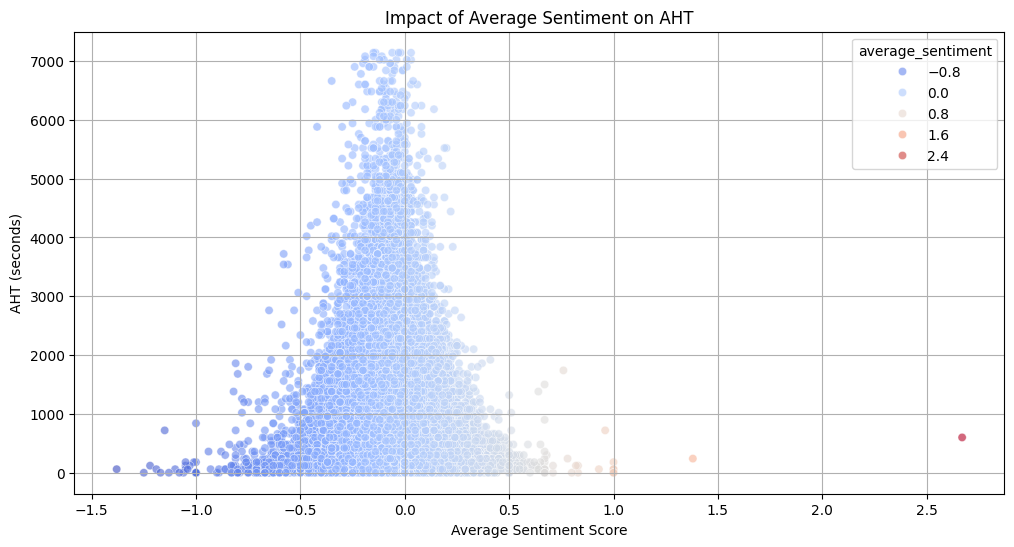

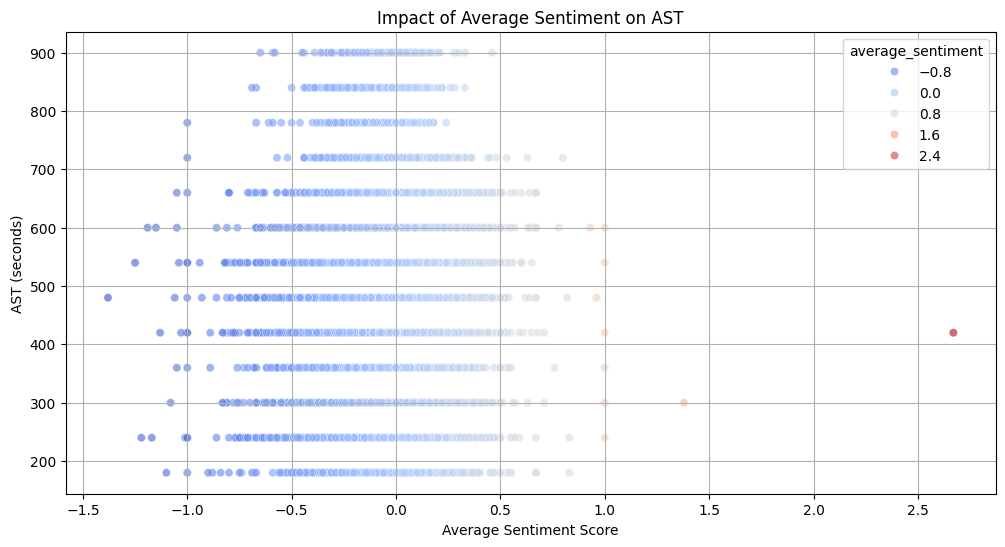

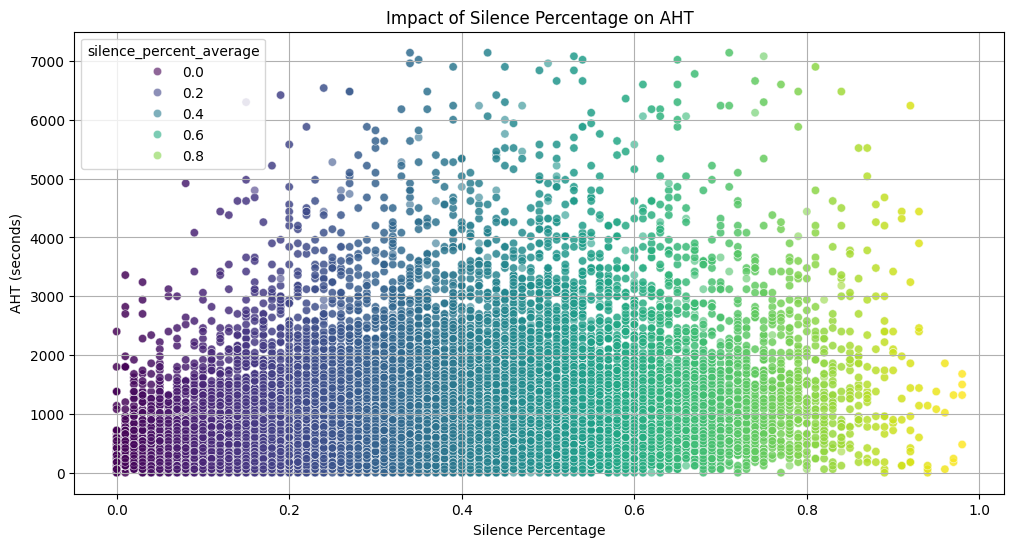

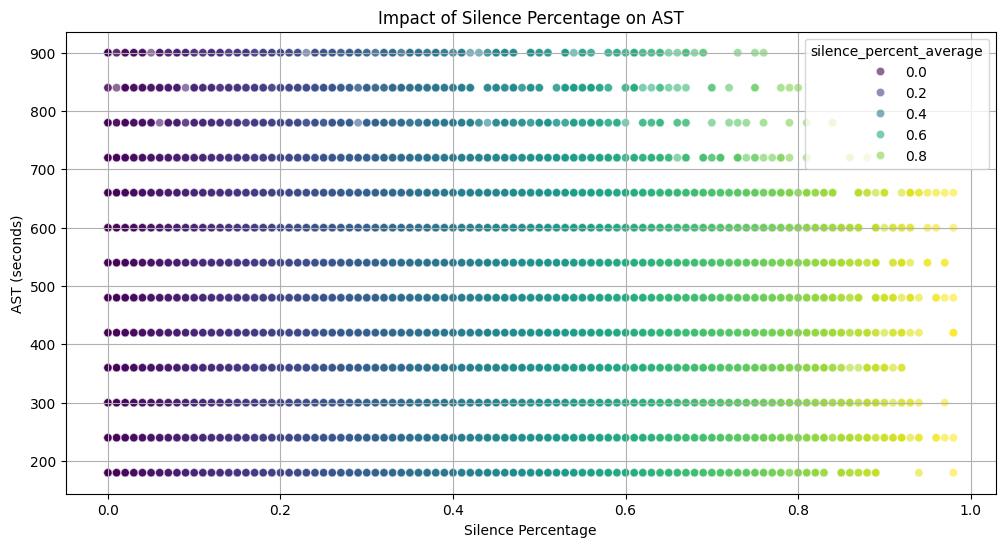

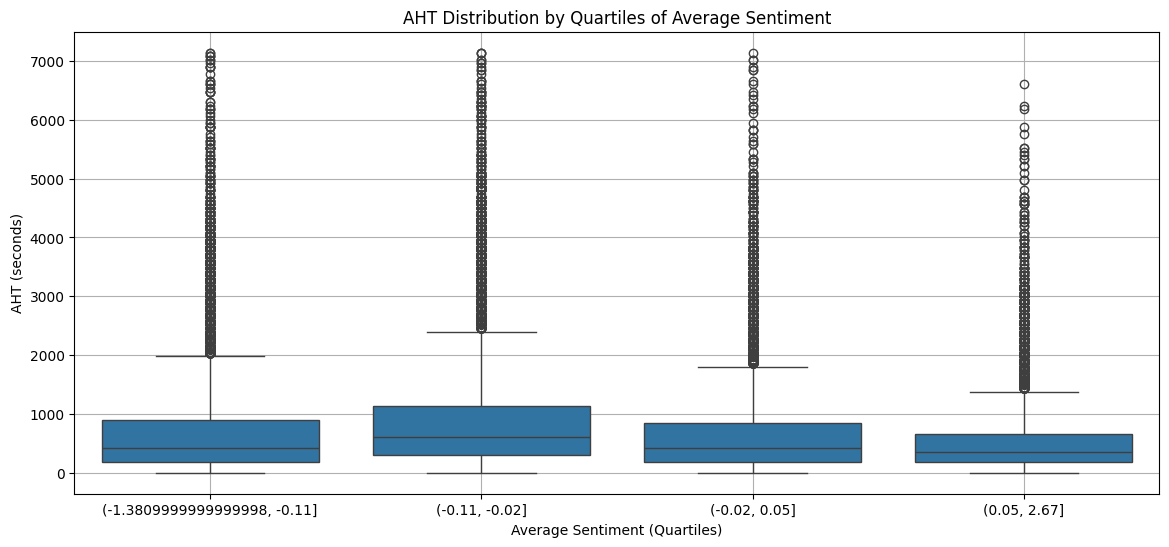

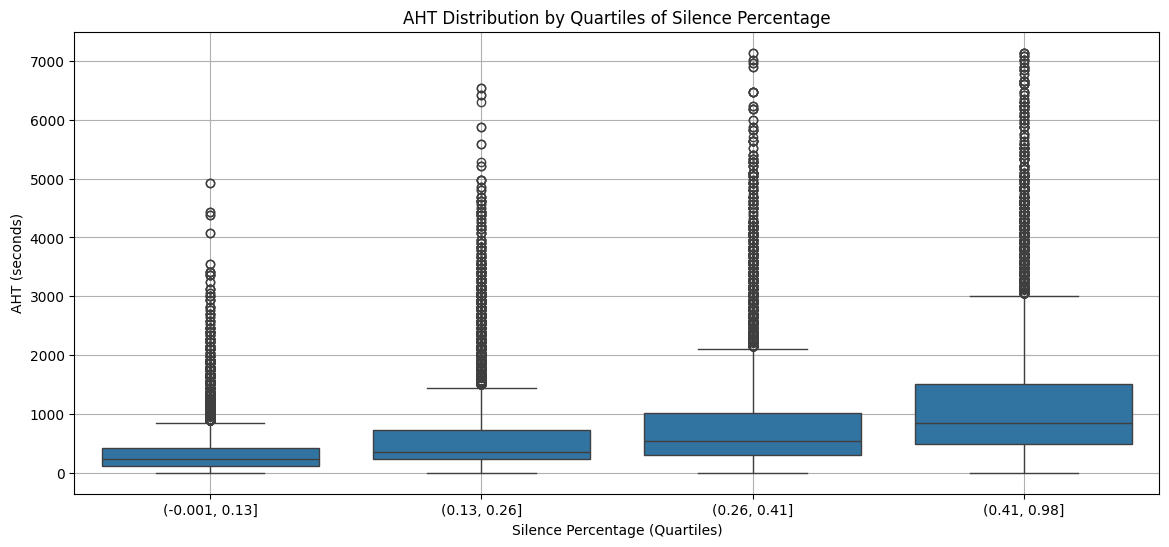

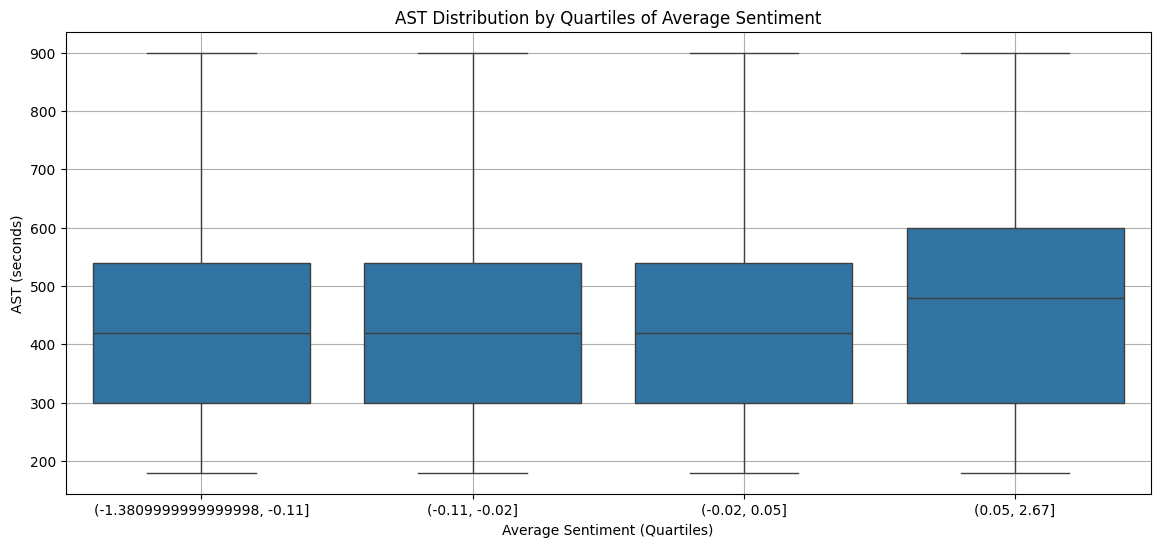

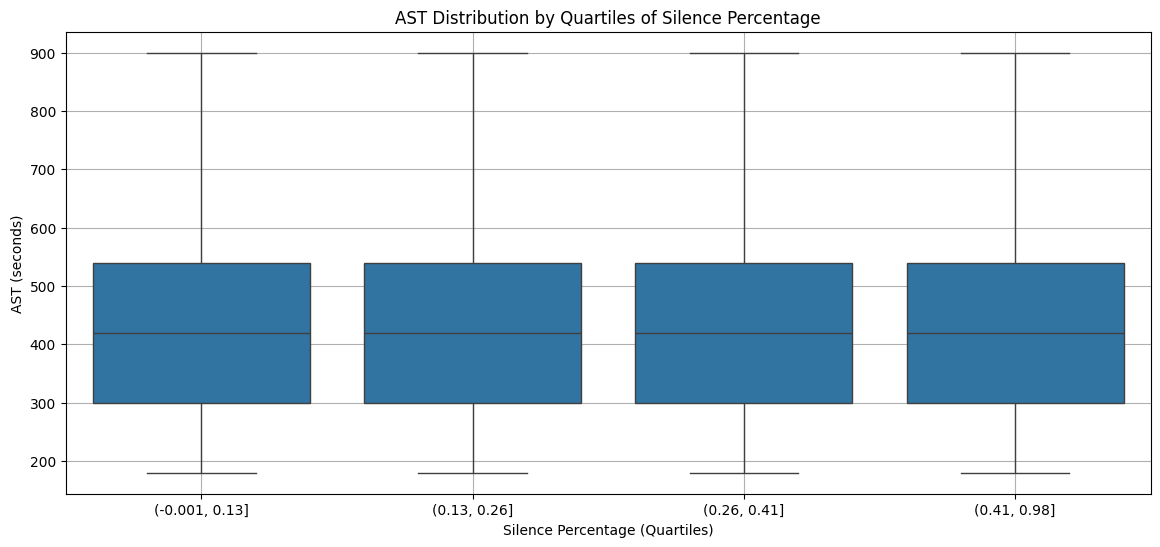

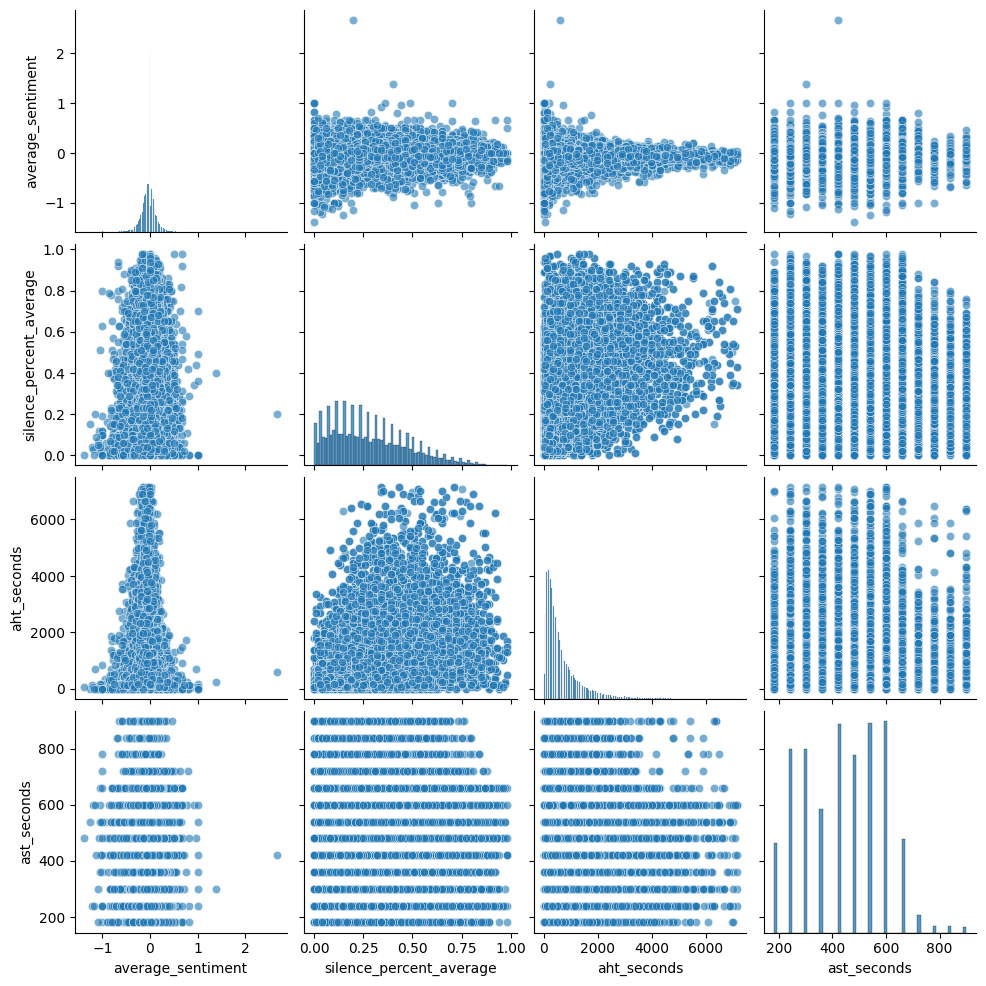

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'merged_df' is the DataFrame containing relevant data

# 1. Convert necessary columns to datetime format
merged_df['call_start_datetime'] = pd.to_datetime(merged_df['call_start_datetime'])
merged_df['agent_assigned_datetime'] = pd.to_datetime(merged_df['agent_assigned_datetime'])
merged_df['call_end_datetime'] = pd.to_datetime(merged_df['call_end_datetime'])

# 2. Calculate AHT (Average Handle Time) and AST (Average Speed to Answer) in seconds if not already calculated
merged_df['aht_seconds'] = (merged_df['call_end_datetime'] - merged_df['agent_assigned_datetime']).dt.total_seconds()
merged_df['ast_seconds'] = (merged_df['agent_assigned_datetime'] - merged_df['call_start_datetime']).dt.total_seconds()

# 3. Investigate correlation between average_sentiment and silence_percent_average with AHT and AST
correlation_matrix = merged_df[['average_sentiment', 'silence_percent_average', 'aht_seconds', 'ast_seconds']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

# 4. Visualize the impact of average_sentiment on AHT
plt.figure(figsize=(12, 6))
sns.scatterplot(x='average_sentiment', y='aht_seconds', data=merged_df, hue='average_sentiment', palette="coolwarm", alpha=0.6)
plt.title('Impact of Average Sentiment on AHT')
plt.xlabel('Average Sentiment Score')
plt.ylabel('AHT (seconds)')
plt.grid(True)
plt.show()

# 5. Visualize the impact of average_sentiment on AST
plt.figure(figsize=(12, 6))
sns.scatterplot(x='average_sentiment', y='ast_seconds', data=merged_df, hue='average_sentiment', palette="coolwarm", alpha=0.6)
plt.title('Impact of Average Sentiment on AST')
plt.xlabel('Average Sentiment Score')
plt.ylabel('AST (seconds)')
plt.grid(True)
plt.show()

# 6. Visualize the impact of silence_percent_average on AHT
plt.figure(figsize=(12, 6))
sns.scatterplot(x='silence_percent_average', y='aht_seconds', data=merged_df, hue='silence_percent_average', palette="viridis", alpha=0.6)
plt.title('Impact of Silence Percentage on AHT')
plt.xlabel('Silence Percentage')
plt.ylabel('AHT (seconds)')
plt.grid(True)
plt.show()

# 7. Visualize the impact of silence_percent_average on AST
plt.figure(figsize=(12, 6))
sns.scatterplot(x='silence_percent_average', y='ast_seconds', data=merged_df, hue='silence_percent_average', palette="viridis", alpha=0.6)
plt.title('Impact of Silence Percentage on AST')
plt.xlabel('Silence Percentage')
plt.ylabel('AST (seconds)')
plt.grid(True)
plt.show()

# 8. Investigate sentiment and silence impact on AHT and AST with boxplots
plt.figure(figsize=(14, 6))
sns.boxplot(x=pd.qcut(merged_df['average_sentiment'], q=4), y='aht_seconds', data=merged_df)
plt.title('AHT Distribution by Quartiles of Average Sentiment')
plt.xlabel('Average Sentiment (Quartiles)')
plt.ylabel('AHT (seconds)')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x=pd.qcut(merged_df['silence_percent_average'], q=4), y='aht_seconds', data=merged_df)
plt.title('AHT Distribution by Quartiles of Silence Percentage')
plt.xlabel('Silence Percentage (Quartiles)')
plt.ylabel('AHT (seconds)')
plt.grid(True)
plt.show()

# 9. Analyze AST distribution with sentiment and silence
plt.figure(figsize=(14, 6))
sns.boxplot(x=pd.qcut(merged_df['average_sentiment'], q=4), y='ast_seconds', data=merged_df)
plt.title('AST Distribution by Quartiles of Average Sentiment')
plt.xlabel('Average Sentiment (Quartiles)')
plt.ylabel('AST (seconds)')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x=pd.qcut(merged_df['silence_percent_average'], q=4), y='ast_seconds', data=merged_df)
plt.title('AST Distribution by Quartiles of Silence Percentage')
plt.xlabel('Silence Percentage (Quartiles)')
plt.ylabel('AST (seconds)')
plt.grid(True)
plt.show()

# Optional: Investigate the interaction between sentiment, silence, AHT, and AST using pairplots
sns.pairplot(merged_df[['average_sentiment', 'silence_percent_average', 'aht_seconds', 'ast_seconds']], kind='scatter', plot_kws={'alpha':0.6})
plt.show()

Most Frequent Call Issues:
primary_call_reason
IRROPS                   13057
Voluntary Change         10291
Seating                   6223
Mileage Plus              5487
Post-Flight               3869
Communications            3779
Products and Services     2792
Upgrade                   2682
Baggage                   2616
Booking                   2589
Name: count, dtype: int64
Total Calls: 71810
Self-Solvable Calls: 3893
Proportion of Self-Solvable Issues: 5.42%


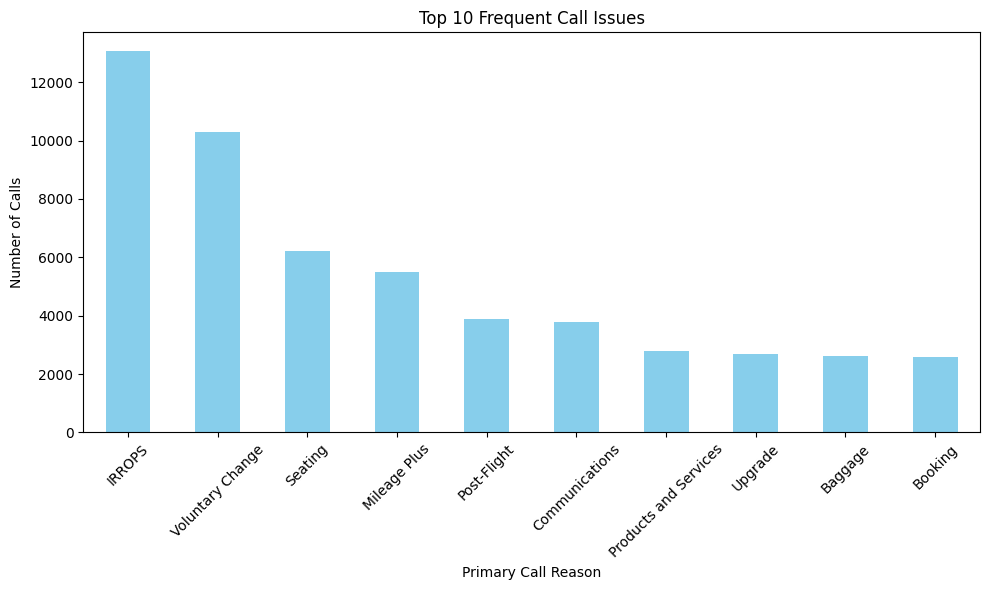

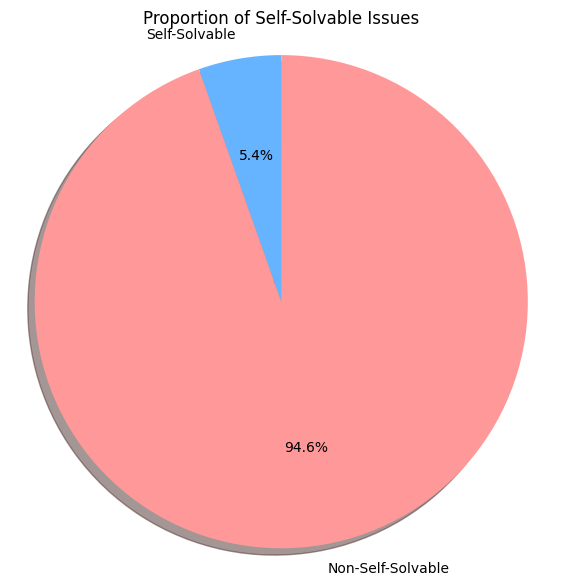

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `merged_df` contains the `primary_call_reason` and other relevant columns.

# 1. Analyze the `primary_call_reason` and count the frequencies of each issue
issue_counts = merged_df['primary_call_reason'].value_counts()

# Display the most frequent call reasons
print("Most Frequent Call Issues:")
print(issue_counts.head(10))

# 2. Define categories for self-solvable issues
# List of issues that can be potentially solved through self-service (IVR)
self_solvable_issues = ['Booking', 'Flight Status', 'Voluntary Cancel', 'Seat Change', 'Check-in']

# 3. Determine the proportion of self-solvable issues
merged_df['is_self_solvable'] = merged_df['primary_call_reason'].apply(lambda x: 1 if x in self_solvable_issues else 0)

# Calculate the proportion of self-solvable issues
total_calls = len(merged_df)
self_solvable_calls = merged_df['is_self_solvable'].sum()
self_solvable_proportion = (self_solvable_calls / total_calls) * 100

print(f"Total Calls: {total_calls}")
print(f"Self-Solvable Calls: {self_solvable_calls}")
print(f"Proportion of Self-Solvable Issues: {self_solvable_proportion:.2f}%")

# 4. Visualize the frequency of categorized issues
plt.figure(figsize=(10, 6))
issue_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Frequent Call Issues')
plt.xlabel('Primary Call Reason')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Visualize the proportion of self-solvable issues
labels = ['Self-Solvable', 'Non-Self-Solvable']
sizes = [self_solvable_calls, total_calls - self_solvable_calls]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Proportion of Self-Solvable Issues')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Step 1: Load datasets
calls = pd.read_csv('calls.csv')
customers = pd.read_csv('customers.csv')
reasons = pd.read_csv('reason.csv')
sentiments = pd.read_csv('sentiment_statistics.csv')
test_data = pd.read_csv('test.csv')

# Step 2: Merge datasets
# Merge calls with reasons
data = pd.merge(calls, reasons, on='call_id', how='inner')
# Merge with customers
data = pd.merge(data, customers, on='customer_id', how='left')
# Merge with sentiment_statistics
data = pd.merge(data, sentiments, on=['call_id', 'agent_id'], how='left')

# Merge test_data with the same features but without reasons
test_data = pd.merge(test_data, calls, on='call_id', how='left')
test_data = pd.merge(test_data, customers, on='customer_id', how='left')
test_data = pd.merge(test_data, sentiments, on=['call_id', 'agent_id'], how='left')

# Step 3: Preprocess the data
# Drop irrelevant or redundant columns
drop_cols = ['call_start_datetime', 'agent_assigned_datetime', 'call_end_datetime', 'call_transcript',
             'customer_name', 'call_id', 'customer_id', 'agent_id']
X = data.drop(columns=drop_cols + ['primary_call_reason'])
y = data['primary_call_reason']

# Step 4: Encode categorical features before using SimpleImputer
# Convert categorical columns to numerical using LabelEncoder
label_encoders = {}
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        test_data[col] = le.transform(test_data[col])  # Apply the same encoding to test data
        label_encoders[col] = le

# Step 5: Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X = imputer.fit_transform(X)
test_X = imputer.transform(test_data.drop(columns=drop_cols))

# Step 6: Split the dataset for training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 8: Validate the model
y_pred_val = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred_val))

# Step 9: Make predictions on the test dataset
y_test_pred = model.predict(test_X)

# Step 10: Save the predictions
# Combine test data call_id with predictions and save
output = pd.DataFrame({
    'call_id': test_data['call_id'],
    'primary_call_reason': y_test_pred
})

output.to_csv('test_yashkumar.csv', index=False)
print("Predictions saved to test_yashkumar.csv.")

Validation Accuracy: 0.13397344535293676
Predictions saved to test_yashkumar.csv.
